<a href="https://colab.research.google.com/github/AnaliaLeyez/AnaliaLeyez/blob/main/ej_finance_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análisis de Series temporales financieras con Prophet

La librería **Prophet**, desarrollada por Facebook (Meta), es una herramienta de código abierto diseñada para realizar pronósticos de series temporales de manera fácil y flexible.

Prophet está especialmente diseñada para manejar series temporales con componentes complejos como tendencias no lineales, estacionalidades múltiples y puntos de cambio en los datos.

Prophet es un modelo basado en adiciones de componentes (additive model) que facilita el modelado de series temporales complejas, especialmente en datos que presentan:

* Tendencias de crecimiento no lineal: Por ejemplo, cuando los datos crecen de manera exponencial o cambian de dirección.
* Estacionalidad: Patrones que se repiten en intervalos regulares, como diario, semanal o anual.
* Puntos de cambio: Momentos en los que la tendencia cambia repentinamente, como una caída o incremento drástico.


**Prophet** descompone la serie temporal en componentes fundamentales:

* Tendencia (Trend): Describe la dirección a largo plazo de la serie. Puede ser de crecimiento lineal o logístico.
* Estacionalidad (Seasonality): Captura patrones repetitivos, como ciclos anuales, mensuales, semanales o diarios.
* Festividades (Holidays): Permite capturar efectos de fechas especiales, como vacaciones o eventos que afecten la serie.


**Prophet** utiliza un modelo aditivo de la forma:


y(t)=g(t)+s(t)+h(t)+ϵ
donde:
g(t): Componente de tendencia.
s(t): Componente de estacionalidad.
h(t): Componente de días especiales o festivos.
ϵ: : Error o ruido aleatorio en el modelo.


**Prophet** construye la predicción sumando estos componentes de manera aditiva.

**Componentes principales de Prophet**

A. Tendencia (Trend)

Prophet permite dos tipos de tendencias principales:
* Crecimiento lineal: Una línea recta que sigue una tasa de crecimiento constante.
* Crecimiento logístico: Una curva de crecimiento en forma de "S" que se adapta bien cuando la serie tiene un límite máximo.

La tendencia puede incluir puntos de cambio automáticos, donde Prophet detecta cambios bruscos en la dirección o tasa de crecimiento de la tendencia. Esto permite que el modelo se adapte mejor a cambios en el comportamiento de la serie, como incrementos o caídas repentinas.

B. Estacionalidad (Seasonality)

Prophet maneja la estacionalidad como patrones repetitivos, que pueden ser:
* Anual: Para capturar ciclos anuales en los datos.
* Semanal: Para capturar patrones que se repiten cada semana.
* Diaria: Para datos con estacionalidad diaria (como tráfico web a lo largo del día).
Estos patrones estacionales pueden ajustarse en Prophet utilizando funciones trigonométricas (seno y coseno) para capturar la naturaleza cíclica de la serie.

C. Festividades (Holidays)

Prophet permite agregar eventos específicos (como feriados o eventos especiales) que pueden afectar la serie temporal. Por ejemplo, una serie que analiza ventas puede verse afectada por festividades como Navidad o Black Friday.

D. Punto de cambio (Changepoints)

Prophet detecta automáticamente puntos de cambio en la serie donde la tendencia cambia drásticamente. Esto es útil para capturar cambios repentinos, y permite que el modelo se adapte a cambios en la serie sin necesidad de intervención manual. Prophet también permite ajustar la flexibilidad de los puntos de cambio si se espera que la serie tenga muchas variaciones o que la tendencia cambie frecuentemente.

**Ajuste de parámetros**

Prophet permite personalizar ciertos aspectos del modelo para mejorar la precisión del pronóstico:

* Controlar la sensibilidad de los puntos de cambio: changepoint_prior_scale se ajusta para controlar cuántos puntos de cambio permite el modelo. Un valor bajo reduce la sensibilidad, haciendo que el modelo sea más conservador.

* Ajustar la estacionalidad: Prophet tiene parámetros para ajustar la estacionalidad semanal, anual y de eventos específicos, permitiendo incluso habilitar o deshabilitar estas componentes si no aportan valor al pronóstico.

* Agregar días festivos personalizados: Puedes especificar un conjunto de días festivos que afecten los datos.

Limitaciones
No ideal para series muy cortas: Prophet necesita una cantidad mínima de datos para capturar correctamente patrones estacionales.
Limitado en series con alta variabilidad no periódica: Prophet funciona mejor en series con patrones claros. Si la serie es muy ruidosa o caótica, el pronóstico puede no ser confiable.
Modelo aditivo: Prophet utiliza un modelo aditivo, lo que puede no ser ideal para todas las series temporales.


In [ ]:
#install FB Prophet and yfinance
!pip install prophet




In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

from prophet import Prophet



AttributeError: `np.float_` was removed in the NumPy 2.0 release. Use `np.float64` instead.

El S&P 500 es un índice bursátil que representa el rendimiento de las 500 empresas más grandes y con mayor capitalización de Estados Unidos. Se utiliza como un indicador clave de la salud del mercado de valores estadounidense y se calcula basándose en el valor total de las acciones de esas empresas.

In [ ]:
# Descargar datos históricos del S&P500 (símbolo: ^GSPC) del último anio
sp500 = yf.Ticker("^GSPC")
hist = sp500.history(period="1y")


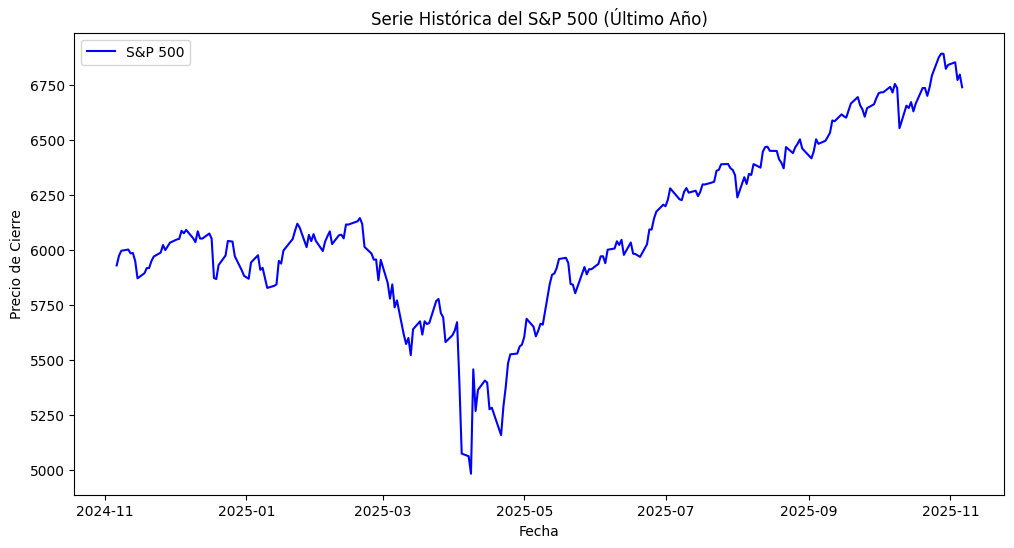

In [ ]:
# Configurar el tamaño de la gráfica
plt.figure(figsize=(12, 6))

# Graficar los precios de cierre
plt.plot(hist.index, hist['Close'], label="S&P 500", color="blue")
#plt.vlines(df.index, ymin=min(df['Valor']), ymax=max(df['Valor']), color='lightgray', linewidth=0.3)


# Añadir etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.title("Serie Histórica del S&P 500 (Último Año)")
plt.legend()

# Mostrar la gráfica
plt.show()


In [ ]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-11-06 00:00:00-05:00,5864.890137,5936.140137,5864.890137,5929.040039,6329530000,0.0,0.0
2024-11-07 00:00:00-05:00,5947.209961,5983.839844,5947.209961,5973.100098,4925740000,0.0,0.0
2024-11-08 00:00:00-05:00,5976.759766,6012.450195,5976.759766,5995.540039,4666740000,0.0,0.0
2024-11-11 00:00:00-05:00,6008.859863,6017.310059,5986.689941,6001.350098,4333000000,0.0,0.0
2024-11-12 00:00:00-05:00,6003.600098,6009.919922,5960.080078,5983.990234,4243400000,0.0,0.0
...,...,...,...,...,...,...,...
2025-10-31 00:00:00-04:00,6879.169922,6879.169922,6814.259766,6840.200195,6398280000,0.0,0.0
2025-11-03 00:00:00-05:00,6882.319824,6882.319824,6820.620117,6851.970215,6065720000,0.0,0.0
2025-11-04 00:00:00-05:00,6788.520020,6820.209961,6766.709961,6771.549805,5739510000,0.0,0.0


In [ ]:
# Eliminar la zona horaria
hist.index = hist.index.tz_localize(None)


In [ ]:
# Preparar los datos para Prophet
df = hist.reset_index()[['Date', 'Close']]
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)


In [ ]:
# Crear y ajustar el modelo
model = Prophet()
model.fit(df)


AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [ ]:
# Crear un DataFrame para futuros 30 días
future = model.make_future_dataframe(periods=30)


In [ ]:
future

,ds
0,2024-06-03
1,2024-06-04
2,2024-06-05
3,2024-06-06
4,2024-06-07
...,...
276,2025-06-29
277,2025-06-30
278,2025-07-01
279,2025-07-02


In [ ]:
# Predecir los valores futuros
forecast = model.predict(future)


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-06-03,5388.032383,5222.033019,5573.729441,5388.032383,5388.032383,11.346021,11.346021,11.346021,11.346021,11.346021,11.346021,0.0,0.0,0.0,5399.378404
1,2024-06-04,5389.408223,5227.980850,5577.830652,5389.408223,5389.408223,23.685491,23.685491,23.685491,23.685491,23.685491,23.685491,0.0,0.0,0.0,5413.093714
2,2024-06-05,5390.784063,5267.622674,5593.738953,5390.784063,5390.784063,33.943730,33.943730,33.943730,33.943730,33.943730,33.943730,0.0,0.0,0.0,5424.727793
3,2024-06-06,5392.159903,5261.263321,5581.664551,5392.159903,5392.159903,22.277784,22.277784,22.277784,22.277784,22.277784,22.277784,0.0,0.0,0.0,5414.437688
4,2024-06-07,5393.535743,5250.672477,5585.859486,5393.535743,5393.535743,28.936638,28.936638,28.936638,28.936638,28.936638,28.936638,0.0,0.0,0.0,5422.472382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2025-06-29,5822.567209,5581.733172,5943.118715,5777.015087,5861.251413,-60.094814,-60.094814,-60.094814,-60.094814,-60.094814,-60.094814,0.0,0.0,0.0,5762.472395
277,2025-06-30,5825.530261,5661.030645,6011.061189,5777.738911,5867.334759,11.346021,11.346021,11.346021,11.346021,11.346021,11.346021,0.0,0.0,0.0,5836.876282
278,2025-07-01,5828.493313,5675.792731,6031.678293,5777.263427,5872.332676,23.685491,23.685491,23.685491,23.685491,23.685491,23.685491,0.0,0.0,0.0,5852.178804
279,2025-07-02,5831.456365,5679.922220,6046.520827,5778.222238,5876.836287,33.943730,33.943730,33.943730,33.943730,33.943730,33.943730,0.0,0.0,0.0,5865.400095


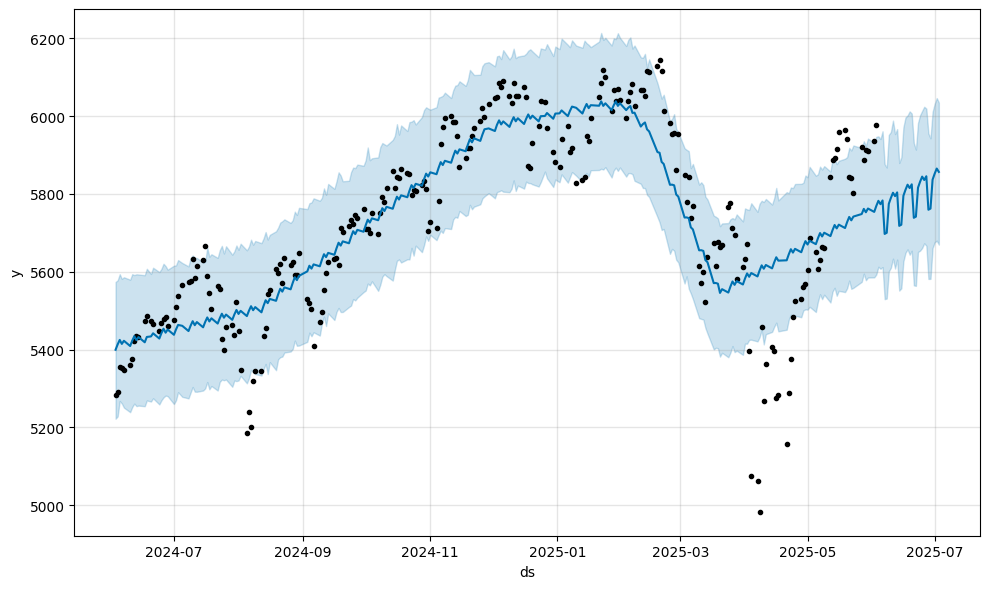

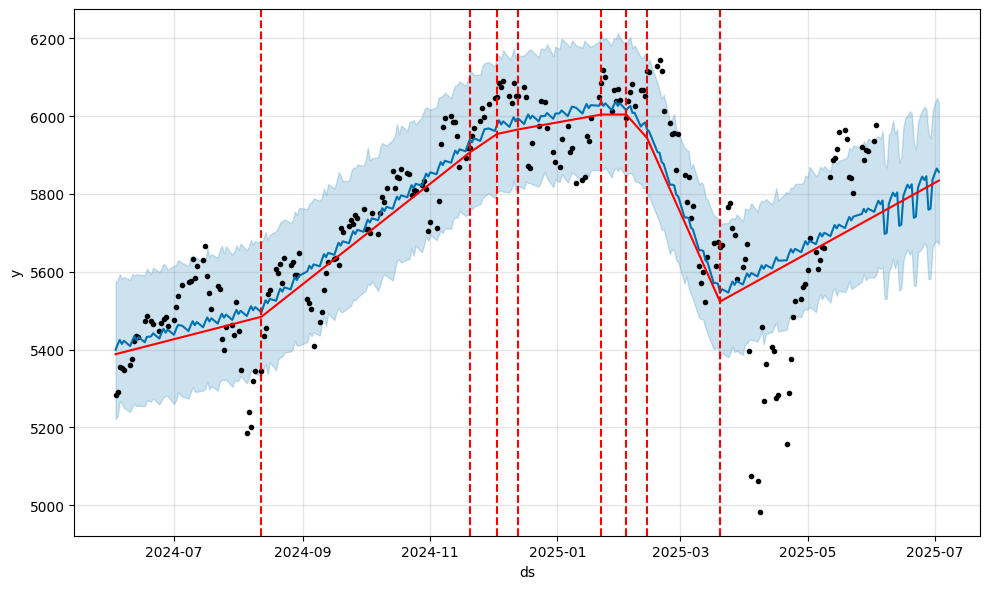

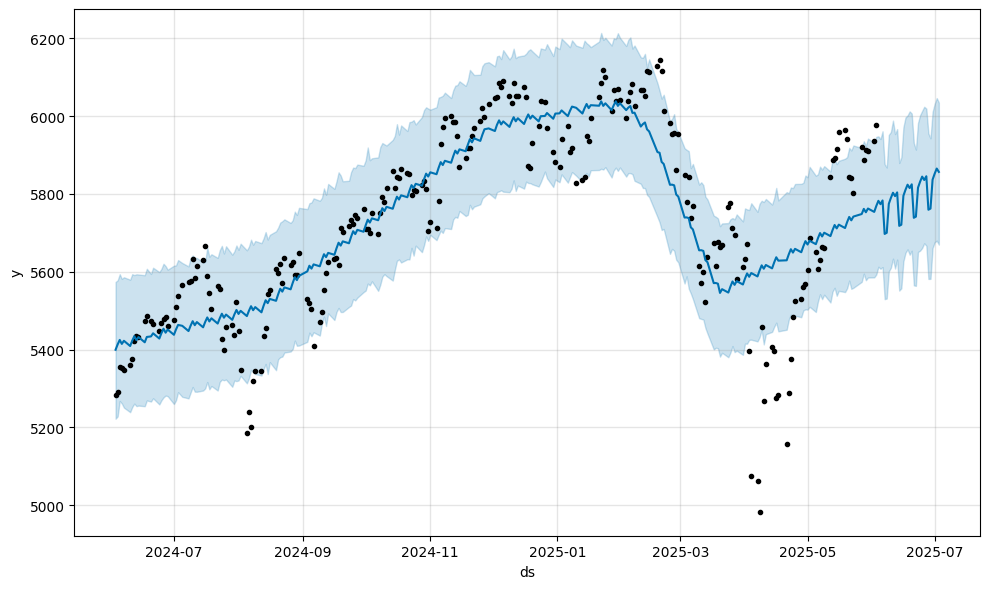

In [ ]:
# Graficar los resultados
# agregando puntos de cambio de tendencia
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)
model.plot(forecast)


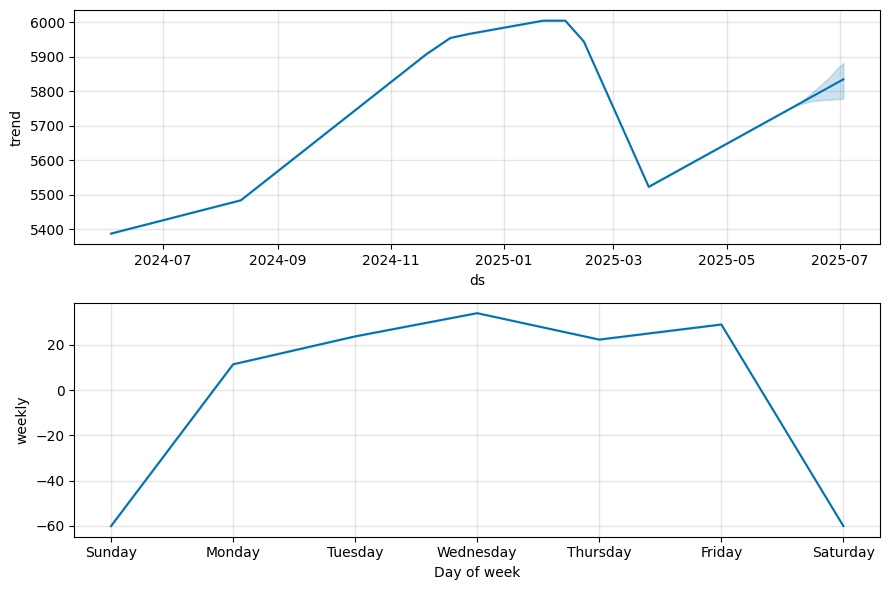

In [ ]:
# Mostrar los componentes de la predicción
fig2 = model.plot_components(forecast)
plt.show()
